In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, filters
from skimage.morphology import disk

Text(0.5, 1.0, 'Segmented Image')

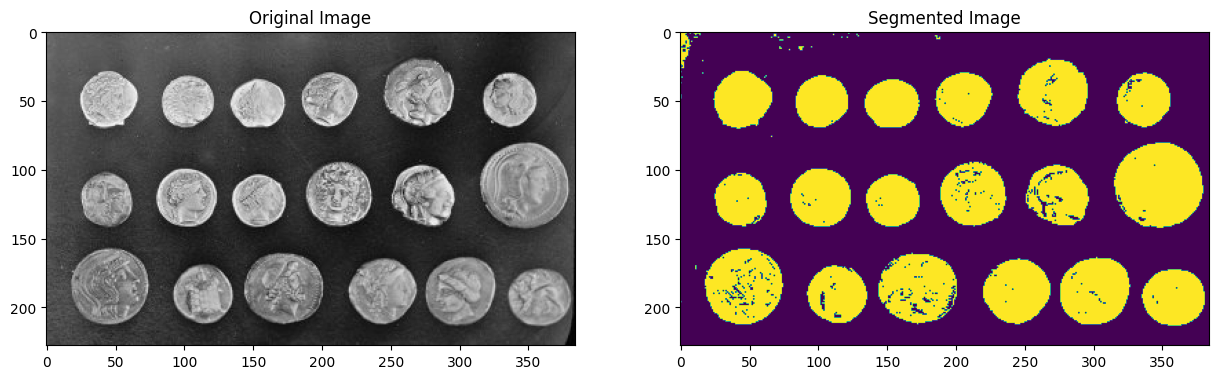

In [ ]:
coins = data.coins()
coins = coins[75:, :]

threshold = 100
seg_I = coins > 100

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(coins, cmap='gray')
plt.title("Original Image")
plt.subplot(122)
plt.imshow(seg_I)
plt.title("Segmented Image")

Text(0, 0.5, 'Pixel count')

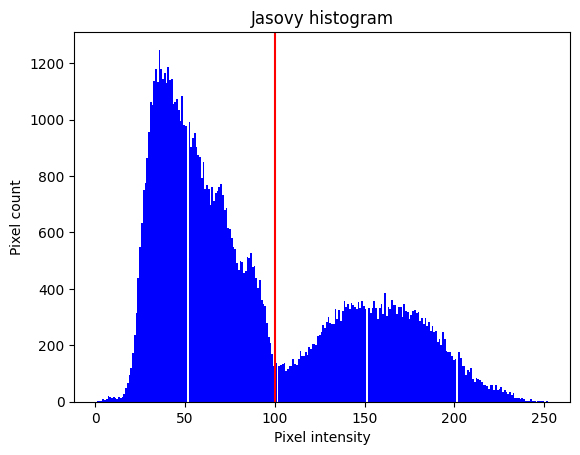

In [ ]:
plt.hist(coins.ravel(), bins=256, histtype='bar', color='blue')
plt.axvline(threshold, color='red')

plt.title("Jasovy histogram")
plt.xlabel('Pixel intensity')
plt.ylabel('Pixel count')

## Autonomous work 1

Change the algorithm for iteratively finding the optimal threshold value so that the initial threshold is calculated as the average of average brightness for objects and background. We consider corner pixels to belong to the background.

Coberged to optimal threshold in 2 iteration with threshold: 107.95877673512632


Text(0.5, 1.0, 'Segmented image')

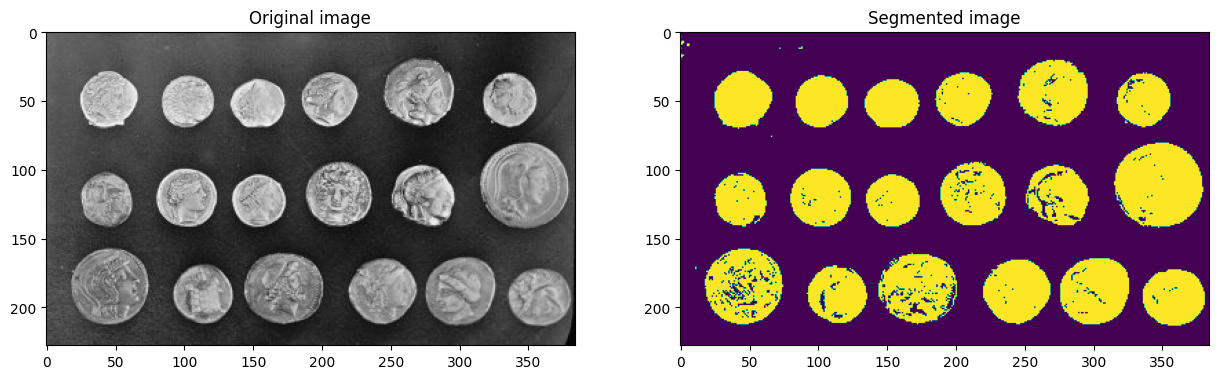

In [ ]:
mean_object_intensity = np.mean(coins[seg_I])
mean_background_intensity = np.mean(coins[seg_I==0])

threshold = (mean_object_intensity + mean_background_intensity) / 2
counter = 0

while True:
  background = coins < threshold
  obj = coins >= threshold

  mean_object_intensity = np.mean(coins[obj])
  mean_background_intensity = np.mean(coins[background])

  new_threshold = (mean_object_intensity + mean_background_intensity) / 2

  if np.abs(threshold - new_threshold) < 0.1:
    break

  counter += 1
  threshold = new_threshold

print("Coberged to optimal threshold in {} iteration with threshold: {}".format(counter, threshold))

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(coins, cmap='gray')
plt.title("Original image")
plt.subplot(122)
plt.imshow(coins > threshold)
plt.title("Segmented image")

## Autonomous work 2

Download the Sonet to Lena image (`sonet_lena.jpg` in example files), and test adaptive local filtering on it. Add working with absolute values to the algorithm above so that you avoid comparing negative values. Try using variable raduis of the mean.

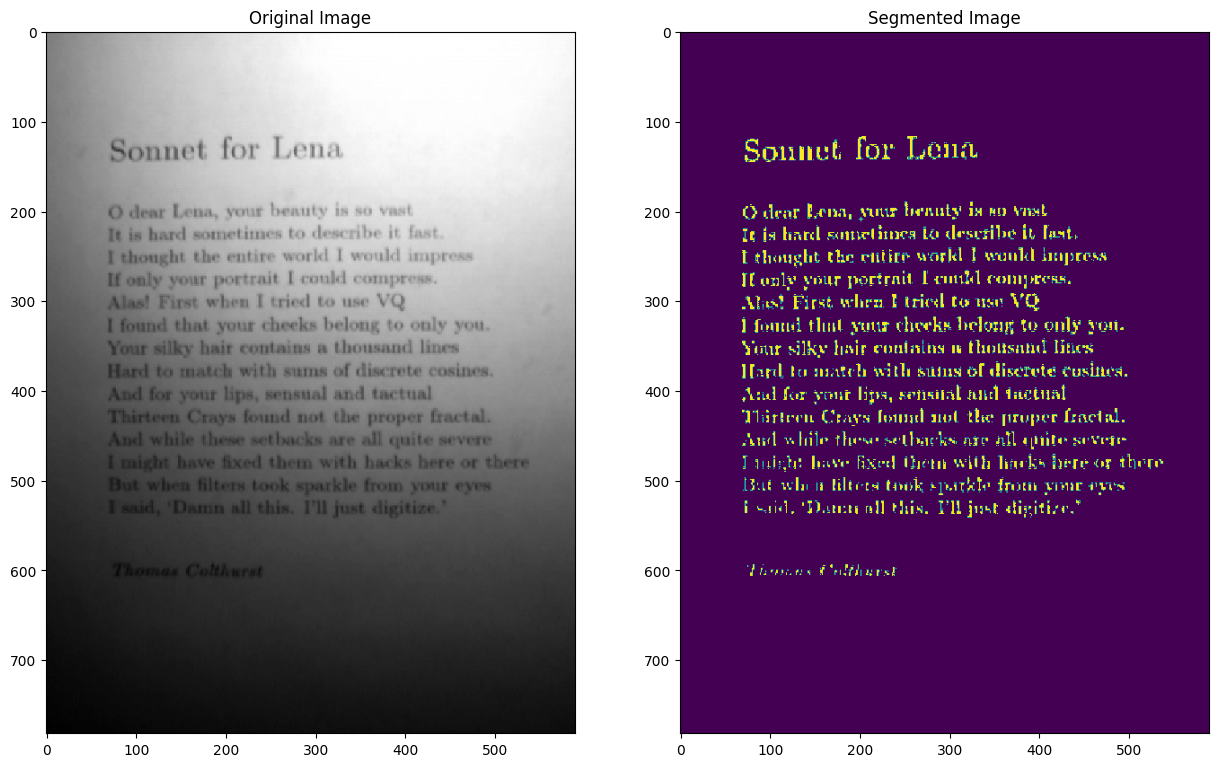

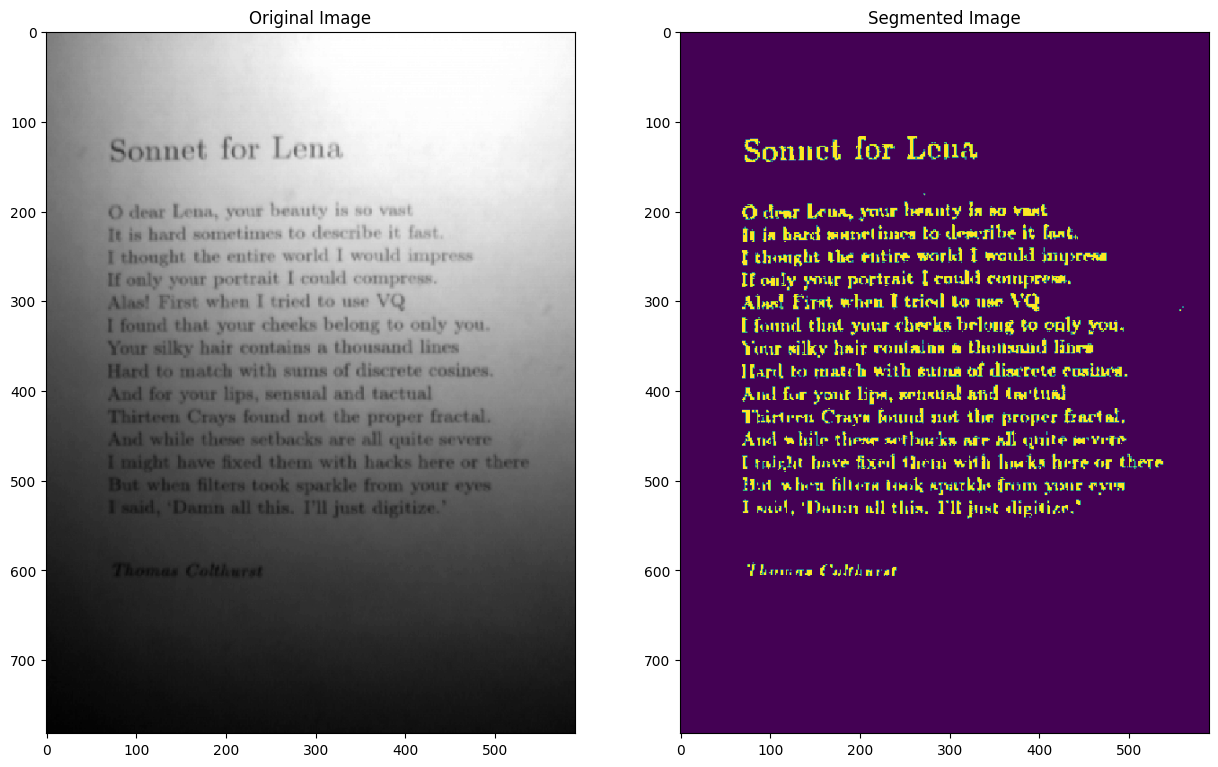

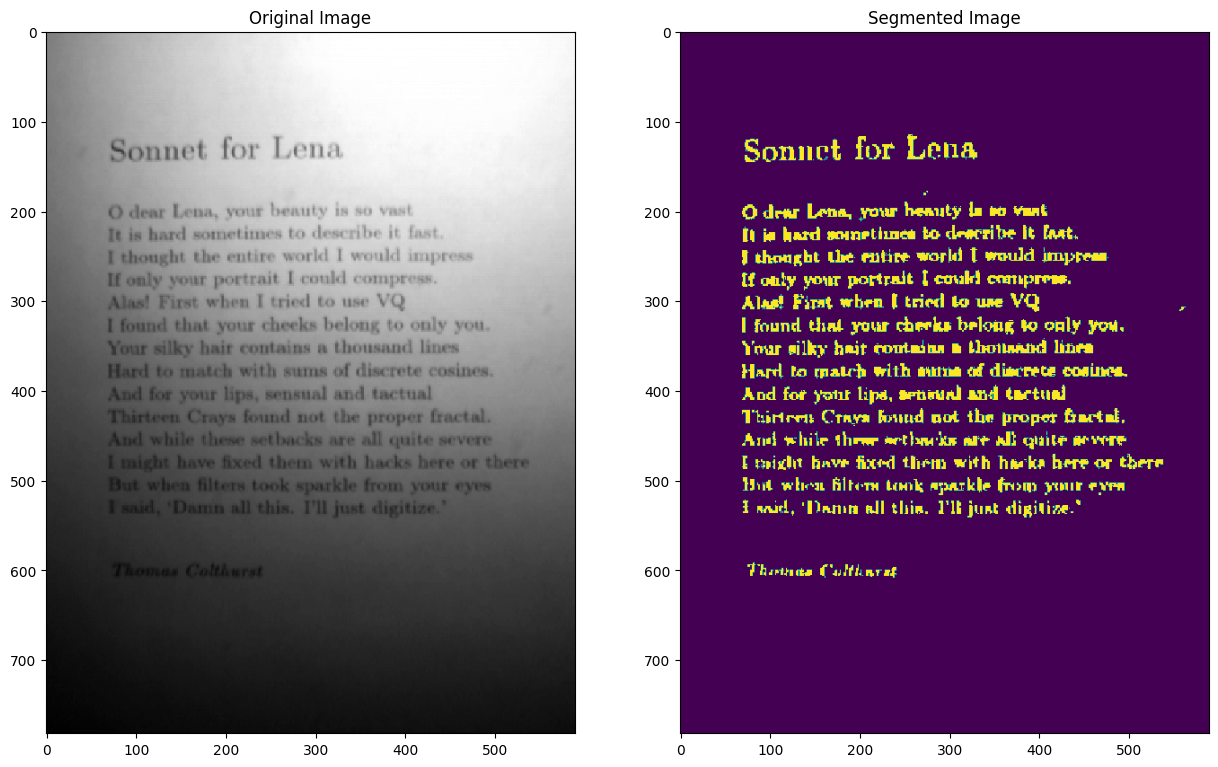

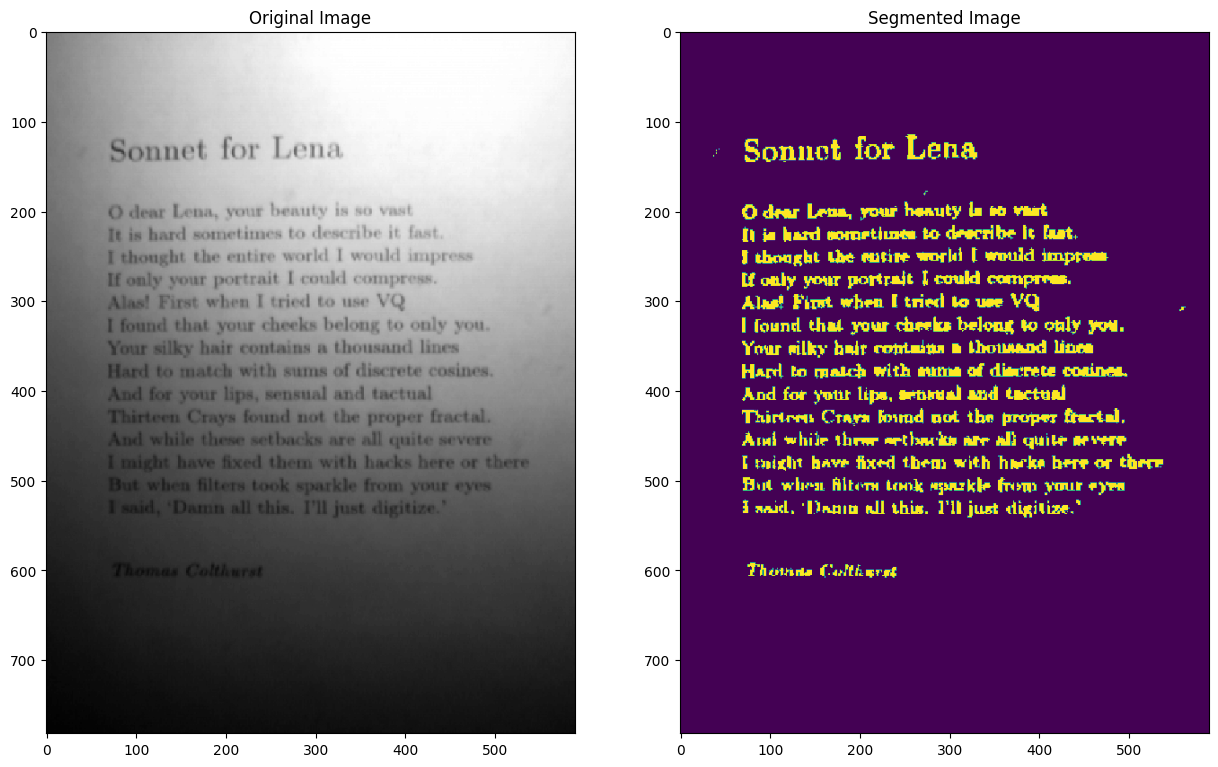

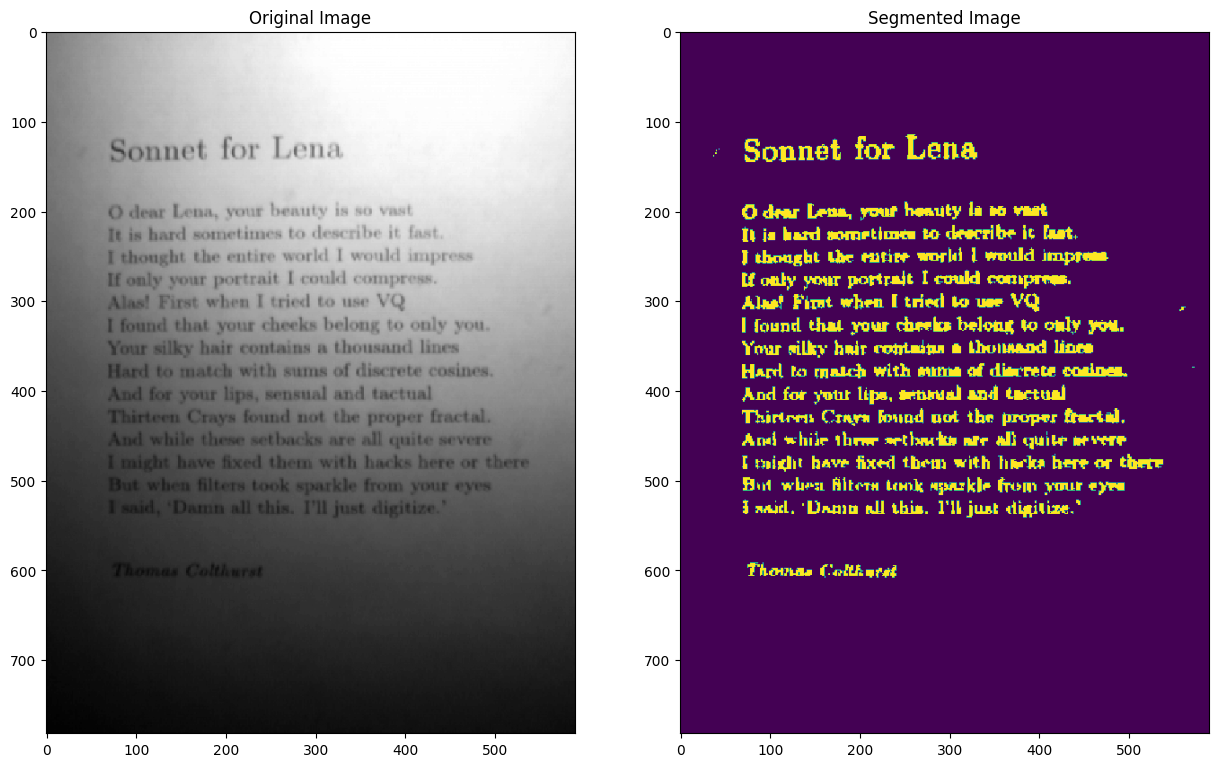

In [ ]:
sonet_lena_image = io.imread("/content/sonet_lena.jpg")
sonet_lena_image = sonet_lena_image[:, :, 0] / 255

radii = [5, 10, 15, 20, 25]
for r in radii:
  s_elem = disk(r)
  sonet_lena_image_filter = filters.rank.mean(sonet_lena_image, s_elem) / 255

  im_t1 = (sonet_lena_image - sonet_lena_image_filter) < -0.03

  plt.figure(figsize=(15, 10))
  plt.subplot(121)
  plt.imshow(sonet_lena_image, cmap='gray')
  plt.title("Original Image")
  plt.subplot(122)
  plt.imshow(im_t1)
  plt.title("Segmented Image")

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


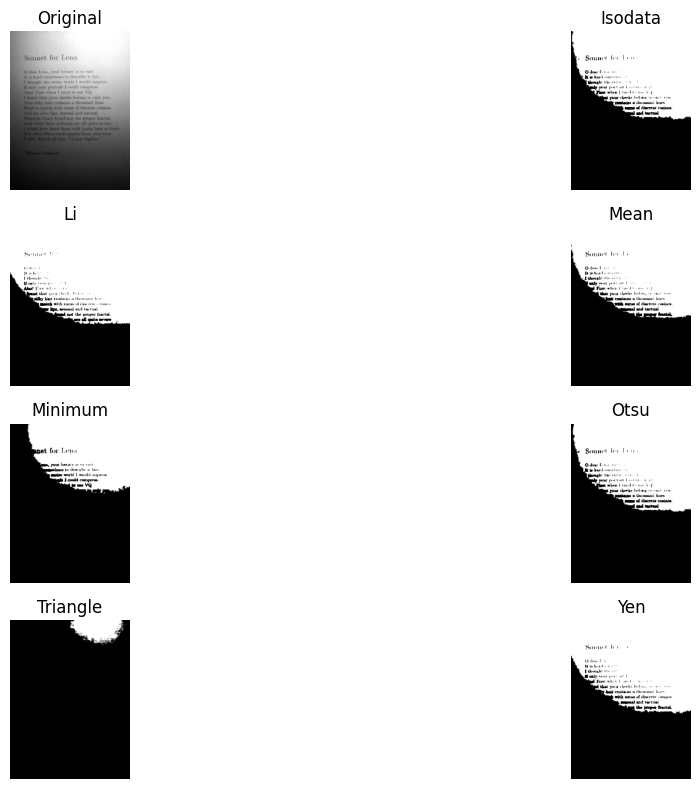

In [ ]:

fig, ax = filters.try_all_threshold(sonet_lena_image, figsize=(16, 8))
plt.show()

## Autonomous work 3

Implement color segmentation so that you select the color of an arbitrary pixel (given by coordinates *a*, *b*), and the segmentation will select all pixels whose color is within a certain distance from the color of the selected pixel. The distance between two colors is defined in the context of a color model as a circle with a given radius. Your implementation should work with parameters *a* and *b* (coordinates of the selected pixel), and *r* (radius of the color circle).

Text(0.5, 1.0, 'LAB Image')

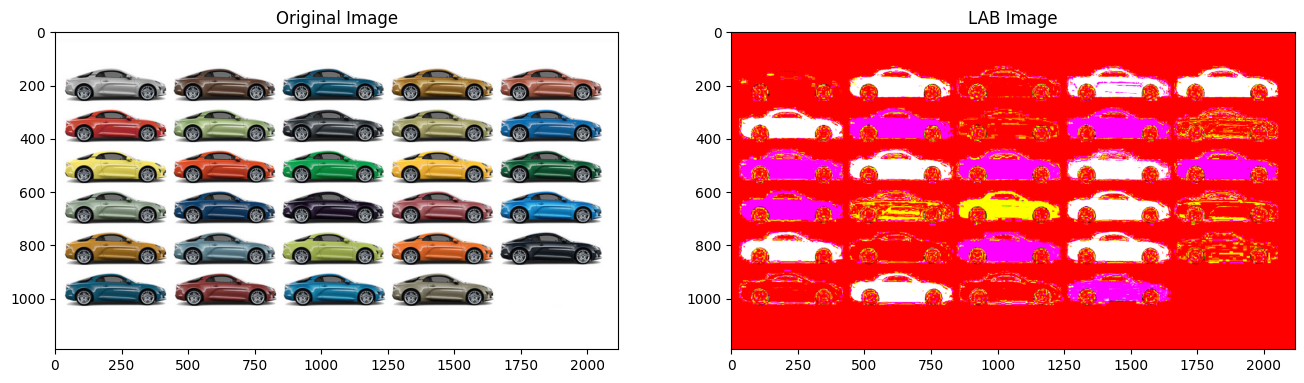

In [3]:
from skimage import color
cars = io.imread("/content/color_cars.jpeg")
carsLab = color.rgb2lab(cars)

plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.imshow(cars)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(carsLab)
plt.title("LAB Image")

Text(0.5, 1.0, 'Segmented Image (r = 20)')

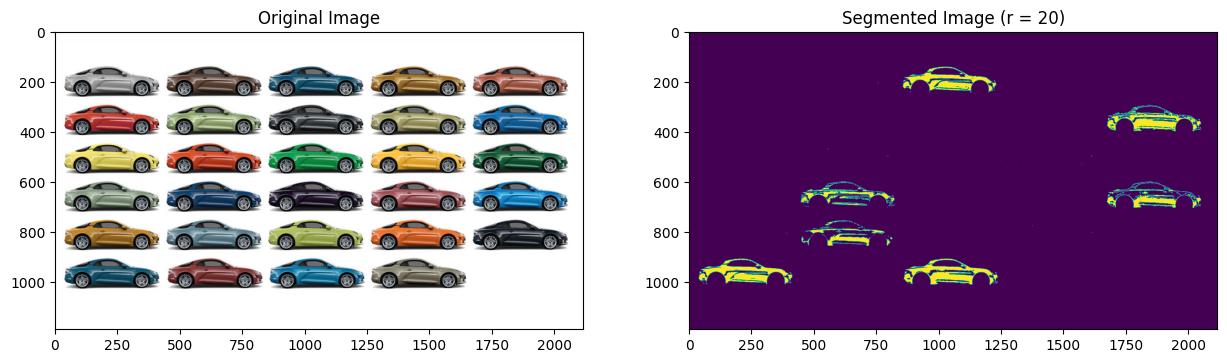

In [35]:
a, b = 1025, 980
r = 20

selected_color = carsLab[b, a]

distance = np.sqrt(
    (carsLab[:, :, 0] - selected_color[0]) ** 2 +
    (carsLab[:, :, 1] - selected_color[1]) ** 2 +
    (carsLab[:, :, 2] - selected_color[2]) ** 2
)

segmentation_mask = (distance < r).astype(np.uint8) * 255

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(cars)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(segmentation_mask)
plt.title(f"Segmented Image (r = {r})")